# Intrusion Detection System
-----------------

## Load Preprocessed Data

In [6]:
import pandas as pd

# load dataset
df = pd.read_csv('../data/preprocessed/test3.csv')
# rename column '0' to ' Label'
# df = df.rename(columns={'0': ' Label'})
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.837186,1.333333e-07,0.000005,0.000000,9.302326e-07,0.000000e+00,0.000242,0.002581,0.00101,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.840070,1.016667e-06,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.840085,5.416666e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.705516,3.916666e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.837156,1.333333e-07,0.000005,0.000000,9.302326e-07,0.000000e+00,0.000242,0.002581,0.00101,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# print rows with Label == NaN
print(df[df[' Label'].isnull()])

Empty DataFrame
Columns: [ Destination Port,  Flow Duration,  Total Fwd Packets,  Total Backward Packets, Total Length of Fwd Packets,  Total Length of Bwd Packets,  Fwd Packet Length Max,  Fwd Packet Length Min,  Fwd Packet Length Mean,  Fwd Packet Length Std, Bwd Packet Length Max,  Bwd Packet Length Min,  Bwd Packet Length Mean,  Bwd Packet Length Std, Flow Bytes/s,  Flow Packets/s,  Flow IAT Mean,  Flow IAT Std,  Flow IAT Max,  Flow IAT Min, Fwd IAT Total,  Fwd IAT Mean,  Fwd IAT Std,  Fwd IAT Max,  Fwd IAT Min, Bwd IAT Total,  Bwd IAT Mean,  Bwd IAT Std,  Bwd IAT Max,  Bwd IAT Min, Fwd PSH Flags,  Fwd URG Flags,  Fwd Header Length,  Bwd Header Length, Fwd Packets/s,  Bwd Packets/s,  Min Packet Length,  Max Packet Length,  Packet Length Mean,  Packet Length Std,  Packet Length Variance, FIN Flag Count,  SYN Flag Count,  RST Flag Count,  PSH Flag Count,  ACK Flag Count,  URG Flag Count,  CWE Flag Count,  ECE Flag Count,  Down/Up Ratio,  Average Packet Size,  Avg Fwd Segment Size,  A

In [8]:
df.shape

(2827876, 71)

## Create Small Dataset

In [4]:
# # create df with N samples of each class which holds at least N samples
# N = 2000
# small_df = pd.DataFrame()
# for label in df[' Label'].unique():
#     if df[df[' Label'] == label].shape[0] >= N:
#         small_df = pd.concat([small_df, df[df[' Label'] == label].sample(N)], ignore_index=True)
#     else:
#         small_df = pd.concat([small_df, df[df[' Label'] == label]], ignore_index=True)

# print(small_df[' Label'].value_counts())
# print('Shape: ', small_df.shape)

 Label
0.0    2000
1.0    2000
Name: count, dtype: int64
Shape:  (4000, 79)


## Refactor Data - Remove Nan and Inf

In [9]:
import numpy as np

small_df = df

# shuffle data
small_df = small_df.sample(frac=1).reset_index(drop=True)
print("Shuffled data:")
print(small_df.head())

# remove nan and inf values
print("Checking for NaN values:", np.isnan(small_df).sum())
print("Checking for Inf values:", np.isinf(small_df).sum())

# remove NaN and Inf values
small_df = small_df.replace([np.inf, -np.inf], np.nan)
small_df = small_df.dropna()

print("Checking for NaN values:", np.isnan(small_df).sum())
print("Checking for Inf values:", np.isinf(small_df).sum())
print()

Shuffled data:
    Destination Port   Flow Duration   Total Fwd Packets  \
0           0.006760    1.022212e-02            0.000023   
1           0.000809    4.574583e-04            0.000005   
2           0.607416    1.166667e-07            0.000005   
3           0.117006    5.166666e-07            0.000009   
4           0.000809    2.542500e-04            0.000000   

    Total Backward Packets  Total Length of Fwd Packets  \
0                 0.000024                     0.000188   
1                 0.000007                     0.000005   
2                 0.000000                     0.000000   
3                 0.000000                     0.000003   
4                 0.000003                     0.000004   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                  1.431071e-06                0.074617   
1                  2.471573e-07                0.001209   
2                  0.000000e+00                0.000000   
3                  0.000000e+00  

## Split Data

In [10]:
from sklearn.model_selection import train_test_split

# split data
X = small_df.drop(columns=[' Label'])
y = small_df[' Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Model Creation

In [11]:
# Create DNN model from tensorflow
import setuptools.dist # needed to avoid error
import tensorflow as tf
from tensorflow import keras

# define the keras model
model = keras.Sequential()
model.add(keras.layers.Dense(50, input_dim=X_train.shape[1], activation='relu')) # hidden layer
model.add(keras.layers.Dense(30, activation='relu')) # hidden layer
model.add(keras.layers.Dense(10, activation='relu')) # hidden layer
model.add(keras.layers.Dense(1, activation='sigmoid')) # output layer
# set learning rate
opt = keras.optimizers.Adam(learning_rate=0.001)
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

2025-01-06 16:25:20.040499: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-06 16:25:20.240568: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-06 16:25:20.329078: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736177120.479407  101772 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736177120.515547  101772 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-06 16:25:20.746955: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [12]:
# fit the keras model on the dataset
model.fit(X, y, validation_split=0.25, epochs=10, batch_size=100)

Epoch 1/10


2025-01-06 16:25:29.396522: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 593853960 exceeds 10% of free system memory.


21210/21210 ━━━━━━━━━━━━━━━━━━━━ 65s 3ms/step - accuracy: 0.9573 - loss: 0.1004 - val_accuracy: 0.9752 - val_loss: 0.0535
Epoch 2/10
  881/21210 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - accuracy: 0.9773 - loss: 0.0525

KeyboardInterrupt: 

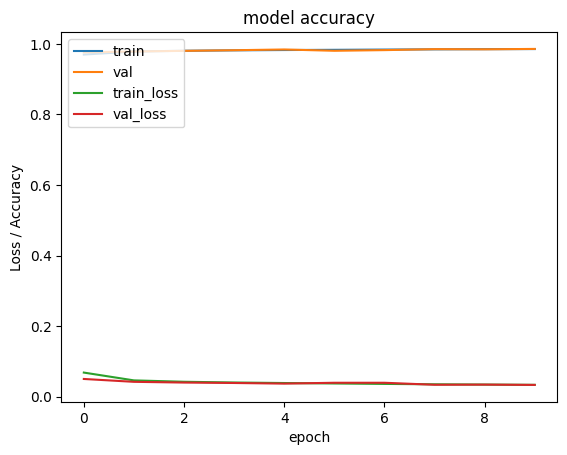

In [11]:
import matplotlib.pyplot as plt

history = model.history.history
# plot loss / accuracy vs epoch for train acc, validation acc, train loss, validation loss
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model accuracy')
plt.ylabel('Loss / Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'train_loss', 'val_loss'], loc='upper left')
plt.show()
